In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")
source("R/prism_compat.R")
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

Loading required package: behavr



In [2]:
experiments <- c("24hr LTM")
trainings <- c("6X_Massed", "6X_Spaced")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO")
intervals <- c("NONE")
data <- data.table::fread(file = "tidy_data_wide.csv")

In [3]:
data$Training <- factor(data$Training, levels=trainings)

In [4]:
panel4_data <- data[Training %in% trainings & Genotype %in% genotypes & interval %in% intervals  & experiment %in% experiments & region_id != "NONE",]

In [5]:
nrow(panel4_data[Training == "6X_Massed" & region_id!="NONE" ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)])

[1] 26

In [6]:
A <- panel4_data[Training == "6X_Massed" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel4_data[Training == "6X_Spaced" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd)
colnames(X) <- trainings

In [7]:
data.table::fwrite(x = A, file="prism/Fig4/Figure_4A_6X_Massed.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4A_6X_Spaced.csv")
data.table::fwrite(x = X, file="prism/Fig4/Figure_4_boxplot.csv")

In [8]:
panel4_data_long <- melt(panel4_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

[1] -1  1
[1] 0.7


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars  N test            PI   PI_median
1: 6X_Massed        0.5      0.0073    ** 52  PRE -0.0009004884  0.00000000
2: 6X_Massed        0.5      0.0073    ** 52 POST -0.1328270063 -0.09523810
3: 6X_Spaced        0.5      0.0033   *** 50  PRE  0.0269047619  0.00000000
4: 6X_Spaced        0.5      0.0033   *** 50 POST -0.1256317460 -0.08333333
       PI_std  std_error x
1: 0.09965180 0.01381922 1
2: 0.23672455 0.03282779 2
3: 0.08387187 0.01186127 1
4: 0.23692860 0.03350676 2


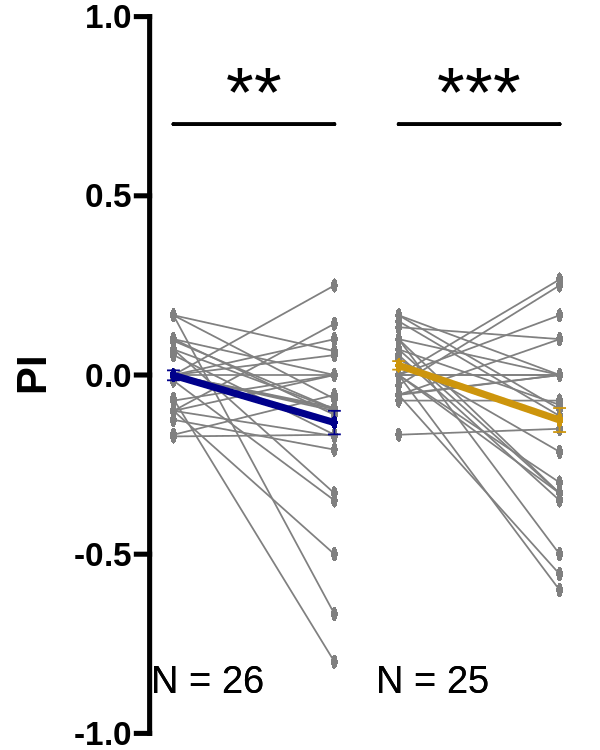

In [9]:
size_unit=2.5
ratio=2.5

panel4A <- learning_plot(
    data=panel4_data_long, "Training",
    textsize=8,
    hjust_text = 0.2,
    y_annotation=.7,
    y_limits=c(-1, 1),
    colors=colors_panel4[1:length(trainings)]    
)
options(repr.plot.width=size_unit*panel4A$n_facets, repr.plot.height=size_unit*ratio)

save_learning_plot(plot=panel4A, filename = "figures/panel4A.svg", size_unit = size_unit, ratio = ratio)
panel4A

In [10]:
summ_statistics <- panel4_data_long[test=="POST", .(PI=mean(PI), stderror=sd(PI)/sqrt(.N)), by=experiment]

In [11]:
# panel4_data[, .(Files, ROI)]

In [12]:
dt_bin <- readRDS("dt_bin.RDS")
metadata <- dt_bin[,meta=TRUE]

In [13]:
metadata_no_training <- metadata[ROI=="NONE",]
metadata <- metadata[ROI!="NONE",]
metadata$ROI <- as.integer(metadata$ROI)

In [14]:
# dt_bin[, meta=T]
metadata <- merge(
    panel4_data[, .(Files, ROI)],
    metadata,
    by=c("Files", "ROI"), all.x=TRUE, all.y=FALSE
)
metadata$ROI <- as.character(metadata$ROI)


In [15]:
metadata <- rbind(metadata, metadata_no_training)

In [16]:
dt_bin<-dt_bin[id %in% metadata$id,]

In [17]:
id<-"id"
group <- "Training"

dt_bin_full <- behavr::rejoin(dt_bin)
dt_bin_full_wide <- add_ghost_data(dt_bin_full, id=id, x="t", columns=c("asleep"), group=group, to_wide=TRUE)

    
dt_bin_full_wide$zt <- dt_bin_full_wide$t/3600
out <- dt_bin_full_wide[ , setdiff(colnames(dt_bin_full_wide), c("zt", "t")), with=FALSE]
print(dim(out))


A <- dt_bin_full[Training == "6X_Spaced", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
B <- dt_bin_full[Training == "6X_Massed", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
C <- dt_bin_full[Training == "No_training", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]

       group__ n_flies max diff
1: No_training      31  31    0
2:   6X_Massed      26  31    5
3:   6X_Spaced      25  31    6
[1] 1
[1] 1
[1] 1
[1] "No_training" "6X_Massed"   "6X_Spaced"  
[1] 55 31
[1] 55 31
[1] 55 31
[1] 55 93


In [18]:
data.table::fwrite(x = out, file="prism/Fig4/Figure_4B_sleep.csv")
data.table::fwrite(x = A, file="prism/Fig4/Figure_4B_6X_Spaced.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4B_6X_Massed.csv")
data.table::fwrite(x = C, file="prism/Fig4/Figure_4B_No_training.csv")

In [19]:
sem <- function(x) {
    return(sd(x) / sqrt(length(x)))
    
}
summ_data <- dt_bin_full[, .(id, t, asleep, Training)][, .(mu=mean(asleep), sem=sem(asleep)), by=.(t, Training)]
summ_data$Training<-factor(as.character(summ_data$Training), levels=c(trainings, "No_training"))

panel4_sleep_trace <- ggplot(data=summ_data, aes(x=t, y=mu, col=Training)) +
    geom_line(linewidth=2) + geom_point() +
    scale_x_hours(name="ZT", breaks=behavr::hours(seq(4, 30, 4))) +
    geom_errorbar(aes(x=t, ymin=mu-sem, ymax=mu+sem), linewidth=1) +
    scale_color_manual(values=colors_panel4[1:3]) +
    scale_y_continuous(name="Time asleep per 30 min bin (mins)")

In [20]:
head(dt_bin_full_wide$zt)

[1] 3.5 4.0 4.5 5.0 5.5 6.0

In [21]:
sleep_zt05_zt11 <- dt_bin_full[(t >= behavr::hours(5)) & (t < behavr::hours(11)) , .(asleep = sum(asleep)), by=.(id, Training)]
sleep_zt05_zt11$Training<-factor(as.character(sleep_zt05_zt11$Training), levels=c(trainings, "No_training"))

In [22]:
A <- sleep_zt05_zt11[Training == "6X_Massed" , asleep]
B <- sleep_zt05_zt11[Training == "6X_Spaced" , asleep]
C <- sleep_zt05_zt11[Training == "No_training" , asleep]
X <- Cbind(A, B, C)
colnames(X) <- c("6X_Massed", "6X_Spaced", "No training")

In [23]:
data.table::fwrite(x=X, file = "prism/Fig4/Figure_4_boxplot_sleep.csv")

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
    id   group__         PRE       POST        dPI outlier
1: 522 6X_Massed  0.00000000  0.2500000  0.2500000    TRUE
2: 536 6X_Massed  0.16666667 -0.6666667 -0.8333333    TRUE
3: 651 6X_Spaced -0.02857143  0.2500000  0.2785714    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

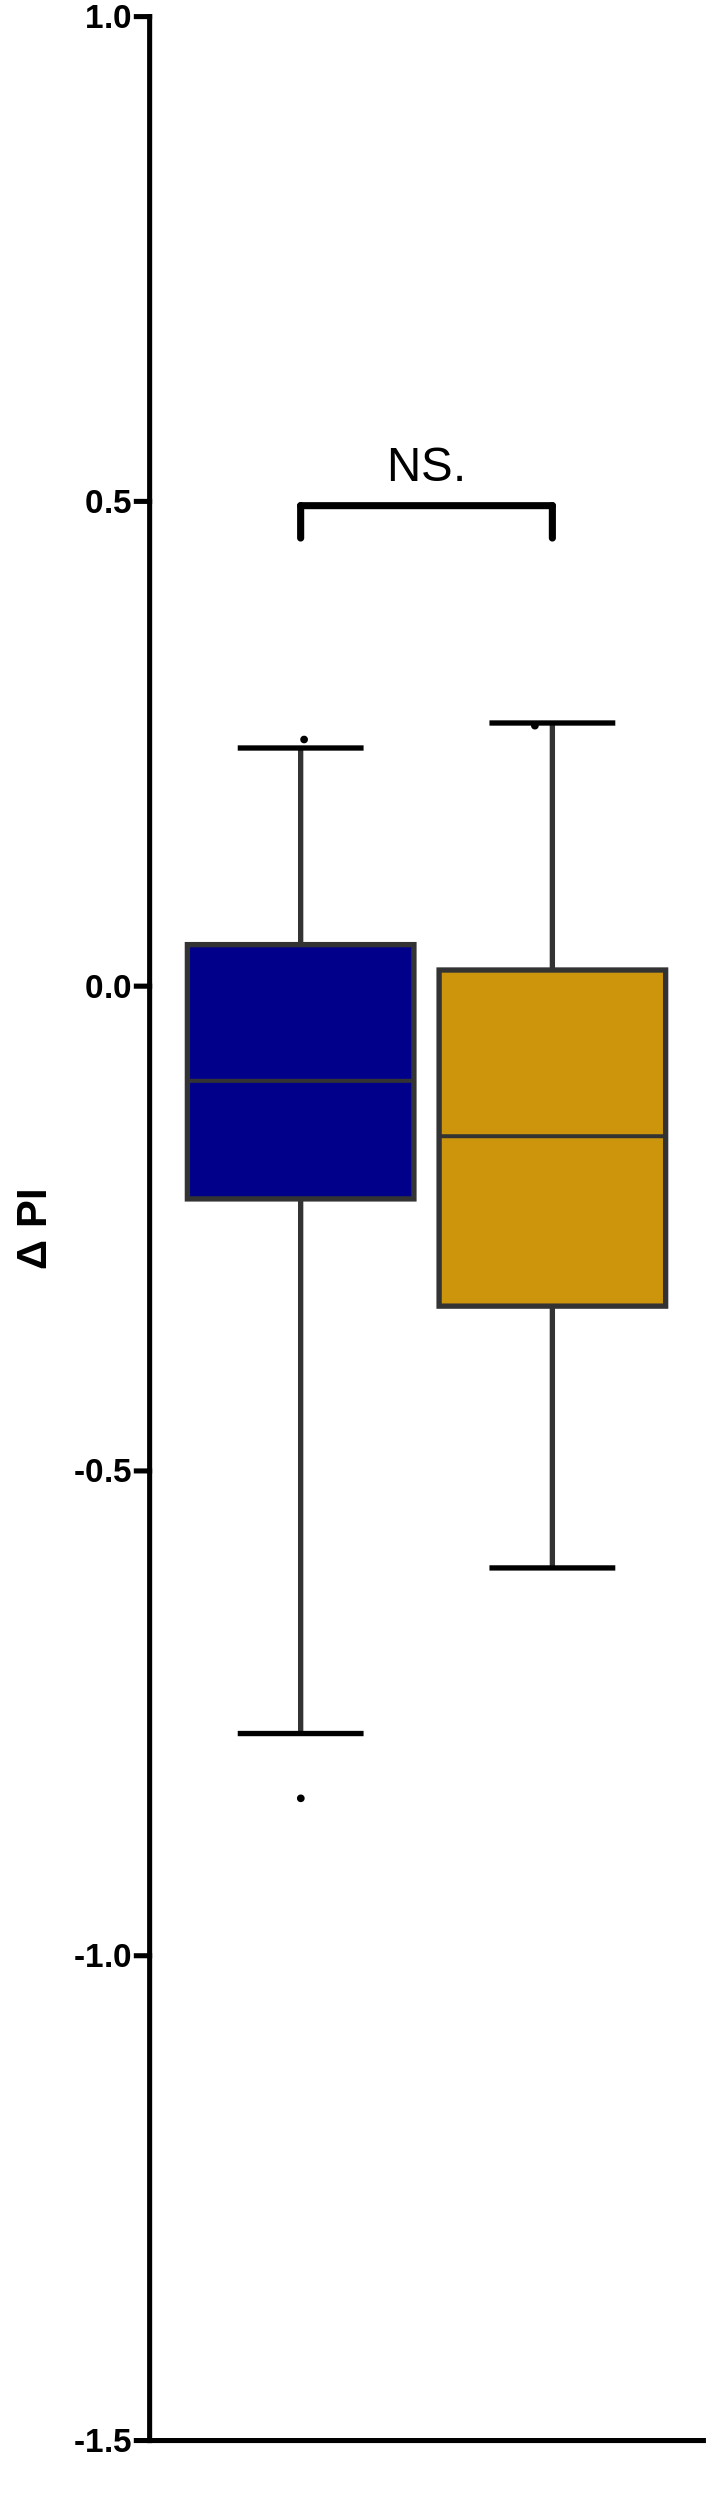

In [24]:
ratio=7
size_unit=3
panel4B <- summary_plot(
    data=panel4_data_long,
    group = "Training", 
    comparisons = list(
        c("6X_Massed", "6X_Spaced")
    ),
    map_signif_level=T,
    annotation_y=c(0.44),
    test=unpaired_t_test,
    colors=colors_panel4[1:length(trainings)],
    x_labels_angle=45,
    y_limits=c(-1.5, 1),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975)
)
panel4B$gg <- panel4B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel4B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel4B
save_summ_plot(plot=panel4B, filename = "figures/panel4B.svg", size_unit=size_unit, ratio=ratio)

In [25]:
preprocess_function <-  function(data, group, test, value.var="PI") {
    data$group__ <- data[[group]]
    data[[paste0("d", value.var)]] <- data$asleep
    return(data)
}


Warning message in `[.data.table`(data, , `:=`(outlier, FALSE)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


[1] "Outliers: "
                              id    Training   asleep     group__      dPI
1: 2023-07-12_15-08-04_036aad|02   6X_Spaced 245.0000   6X_Spaced 245.0000
2: 2023-07-12_15-08-04_036aad|14 No_training 135.1667 No_training 135.1667
3: 2023-07-24_15-17-20_036aad|16   6X_Massed 201.0000   6X_Massed 201.0000
   outlier
1:    TRUE
2:    TRUE
3:    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

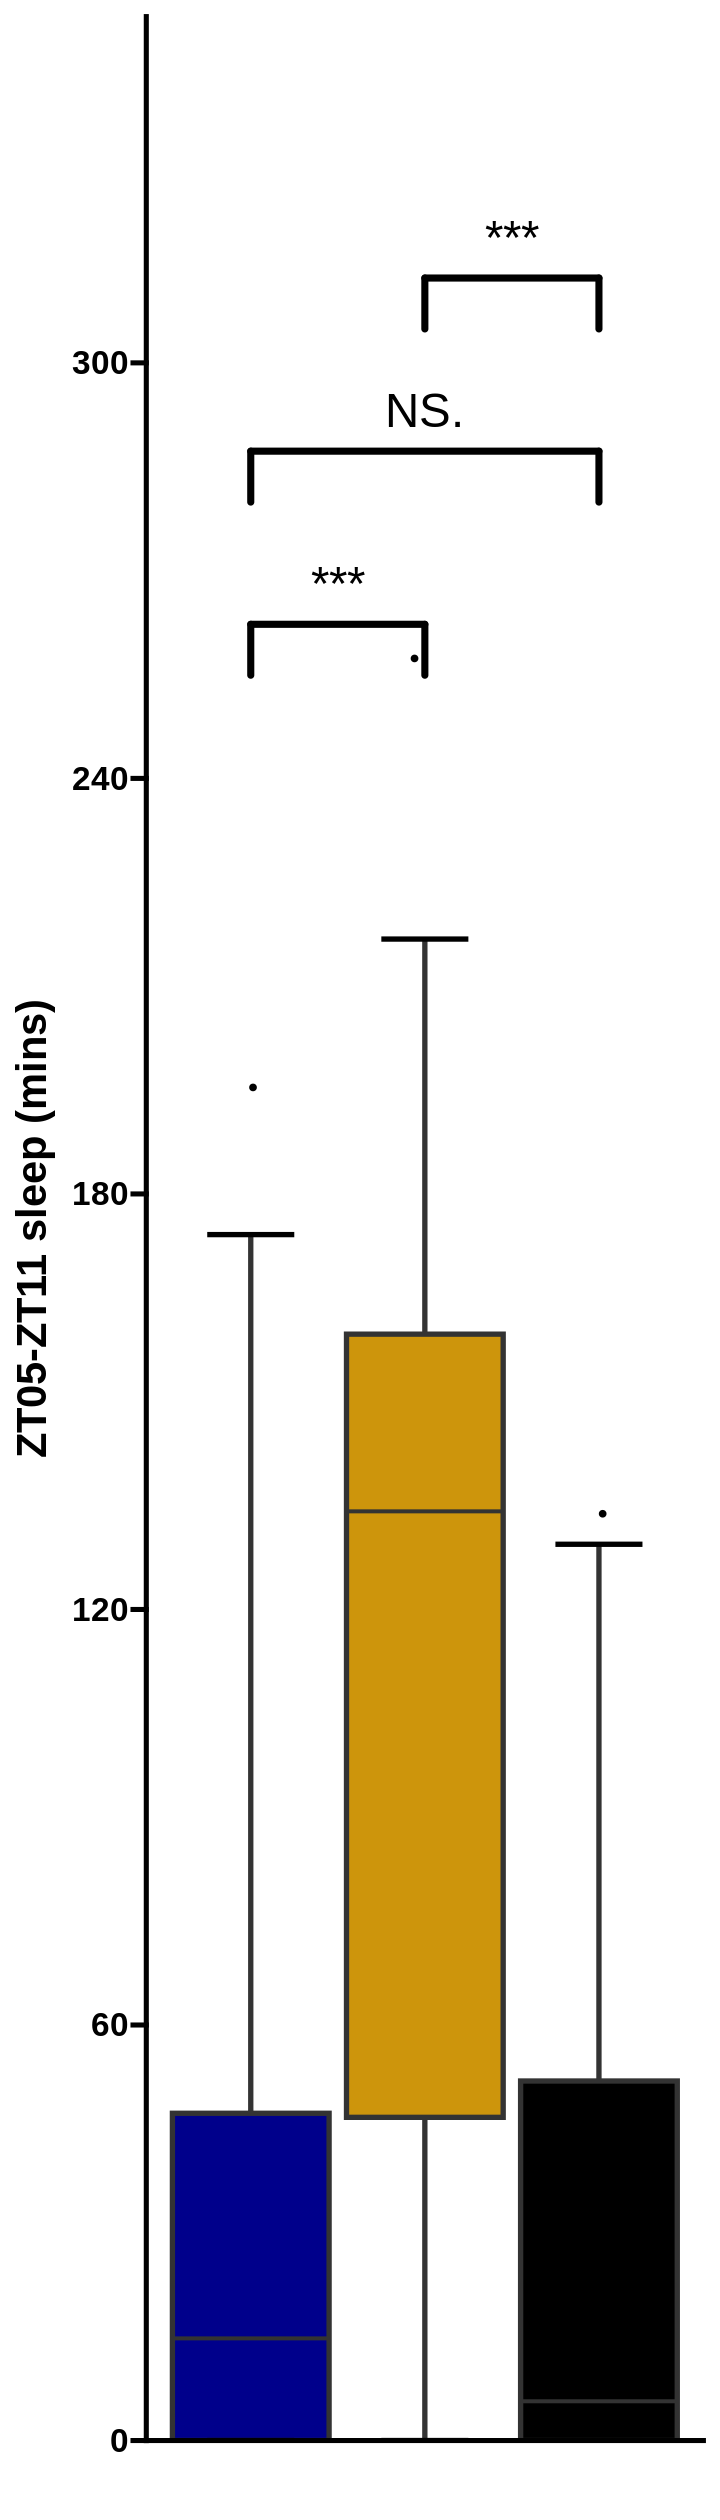

In [26]:
ratio=7
size_unit=3
panel4_boxplot_sleep <- summary_plot(
    data=sleep_zt05_zt11,
    group = "Training", 
    comparisons = list(
        c("6X_Massed", "6X_Spaced"),
        c("No_training", "6X_Spaced"),      
        c("6X_Massed", "No_training")
    ),
    map_signif_level=T,
    annotation_y=c(250, 300, 275),
    test=unpaired_t_test,
    colors=colors_panel4[1:3],
    x_labels_angle=45,
    y_limits=c(0, 350),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975),
    preprocess_function=preprocess_function,
    y_axis_label="ZT05-ZT11 sleep (mins)",
    y_breaks=seq(0, 300, 60)
)
panel4_boxplot_sleep$gg <- panel4_boxplot_sleep$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel4B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel4_boxplot_sleep
save_summ_plot(plot=panel4_boxplot_sleep, filename = "figures/panel4_boxplot_sleep.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.te

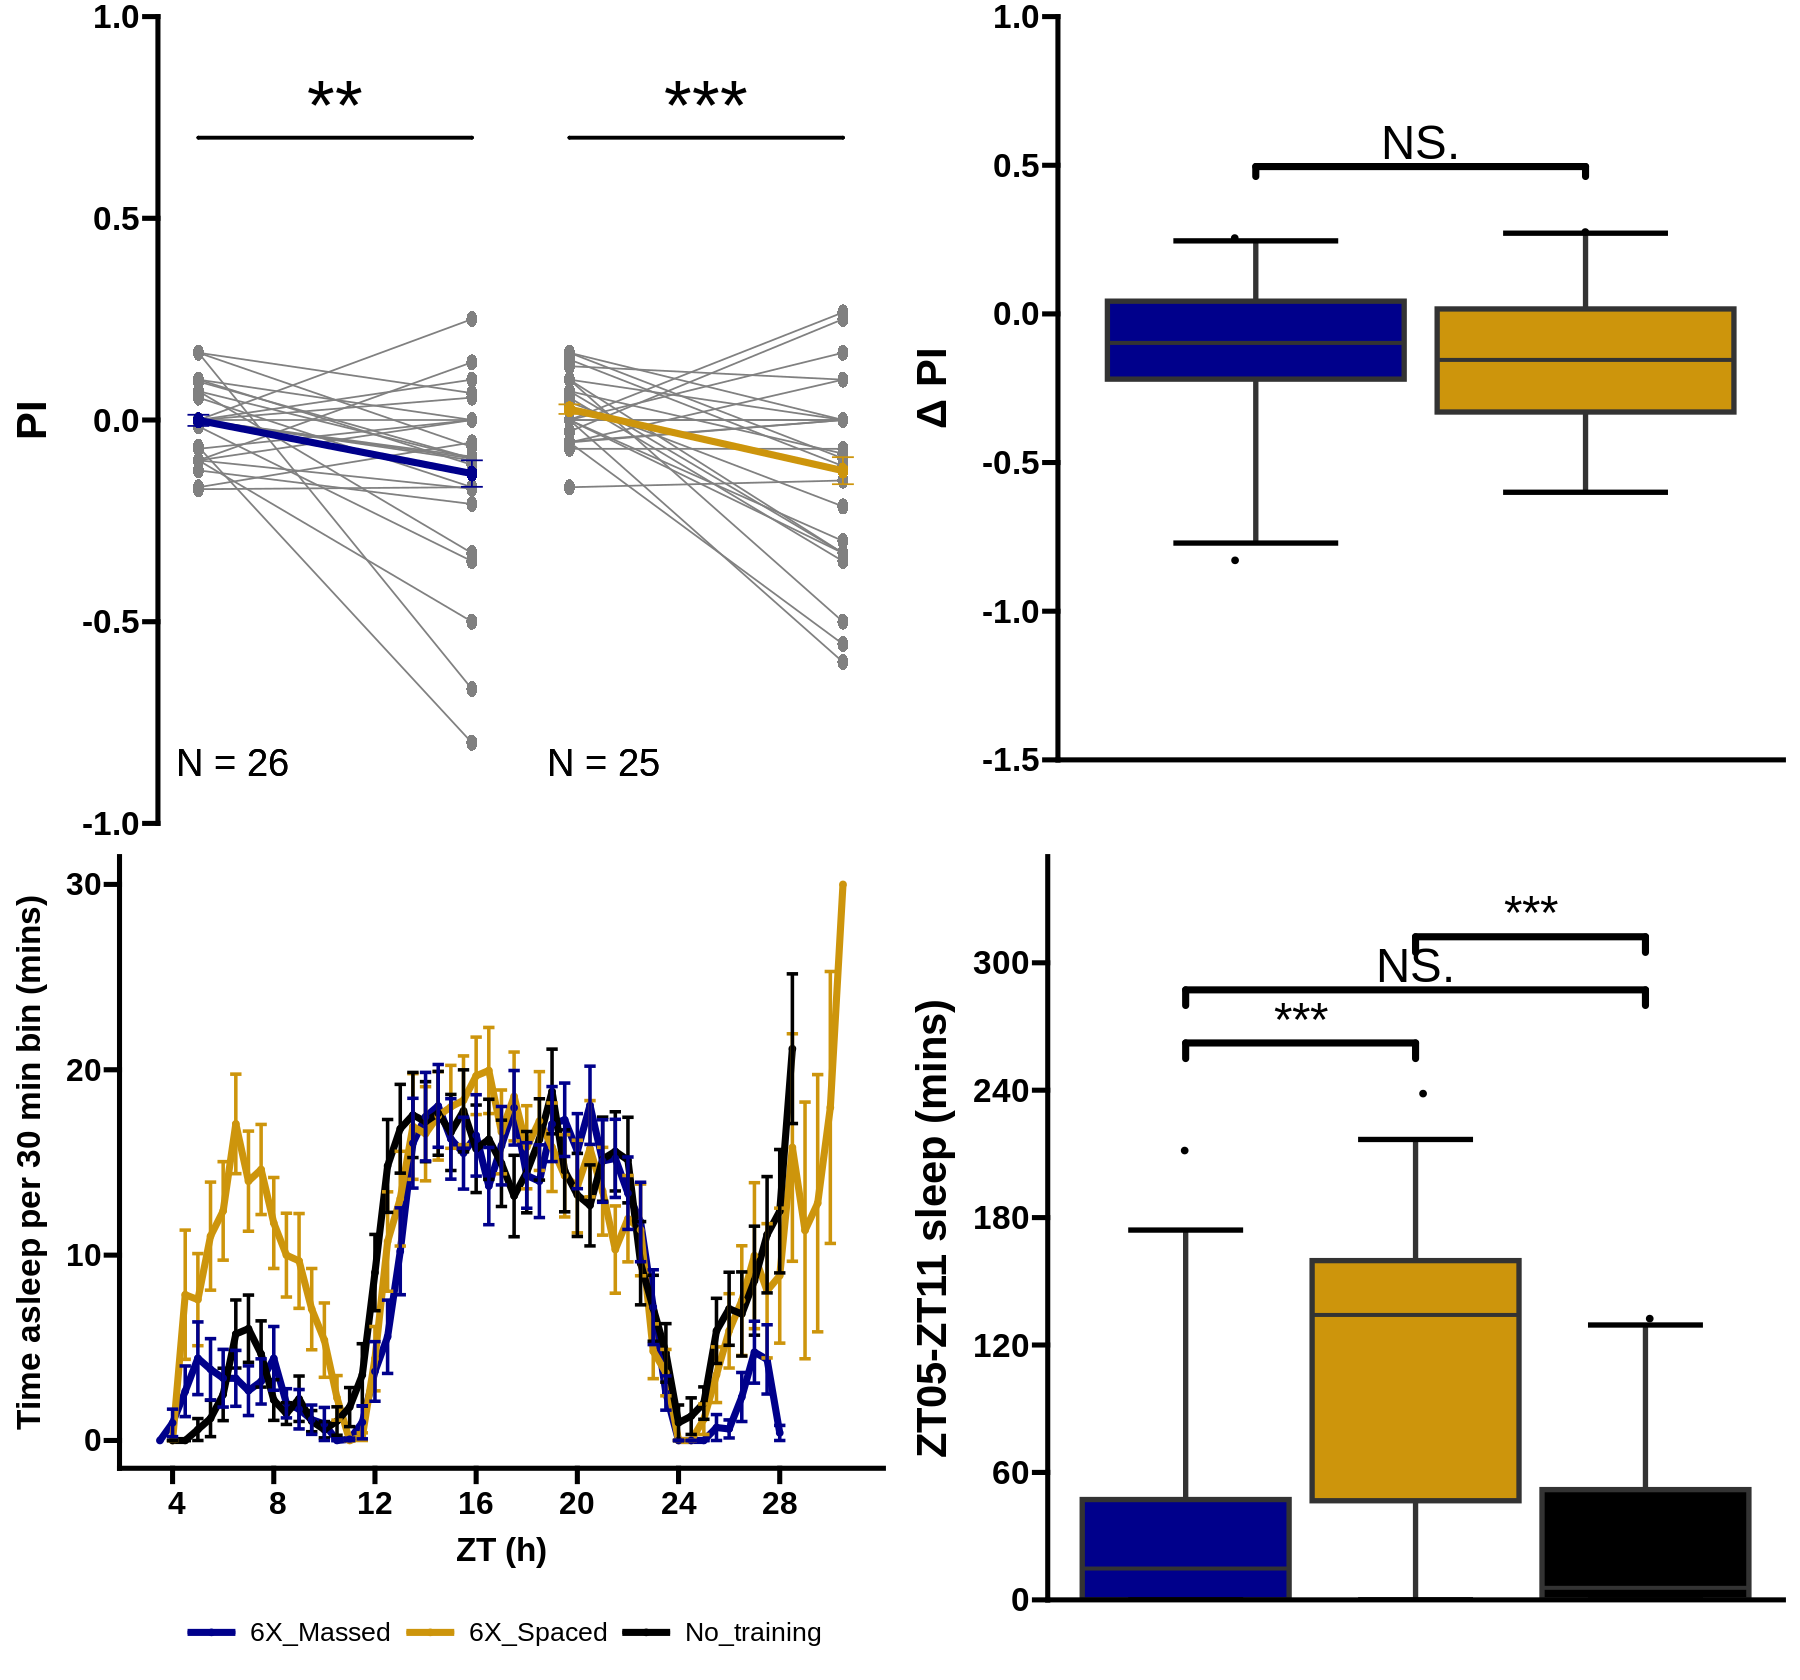

In [27]:
options(repr.plot.width=15)
options(repr.plot.height=14)
gg <- cowplot::plot_grid(
    cowplot::plot_grid(panel4A$gg, panel4B$gg, ncol=2),
    cowplot::plot_grid(
        panel4_sleep_trace + theme(legend.position="bottom", legend.direction="horizontal"),
        panel4_boxplot_sleep$gg,
        ncol=2
    ),
    nrow=2
)
ggsave(plot = gg, filename = "figures/Figure_4.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg